In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

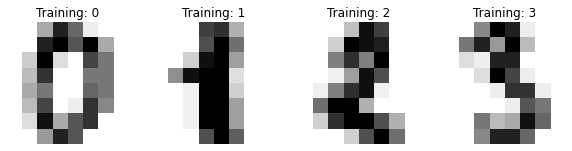

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

clf = svm.SVC(gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [5]:
print(digits.images)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

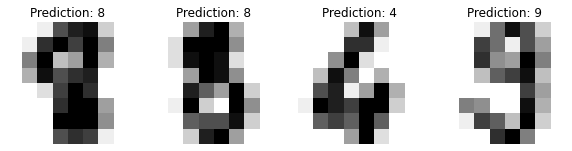

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [7]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [9]:
svc = svm.SVC(kernel='rbf')
svc.fit(X_train.values, y_train)
a = cross_val_score(svc, X_train.values, y_train, cv=3, scoring="accuracy")
print(f"Mean of CV of SVM              : {a.mean()}")
print(f"Accuracy of SVM                : {svc.score(x_test.values, y_test)}")

AttributeError: ignored

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0.98, 'Confusion Matrix')

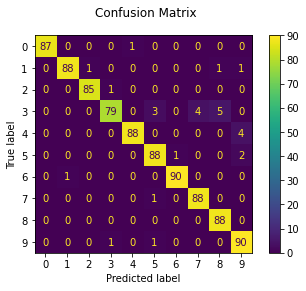

In [22]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

In [11]:
values = set(y_test)

In [12]:
d_pred = dict(zip(values,[0]*10))
for i in range(len(y_test)):
    if y_test[i] == predicted[i]:
        d_pred[y_test[i]] += 1
d_pred

{0: 87, 1: 88, 2: 85, 3: 79, 4: 88, 5: 88, 6: 90, 7: 88, 8: 88, 9: 90}

In [13]:
d_real = dict()
for i in values:
    d_real[i] = list(y_test).count(i)
d_real

{0: 88, 1: 91, 2: 86, 3: 91, 4: 92, 5: 91, 6: 91, 7: 89, 8: 88, 9: 92}

In [14]:
res = list()
for i in values:
    x = round((d_pred[i]/d_real[i])*100,2)
    res.append(x)
res

[98.86, 96.7, 98.84, 86.81, 95.65, 96.7, 98.9, 98.88, 100.0, 97.83]

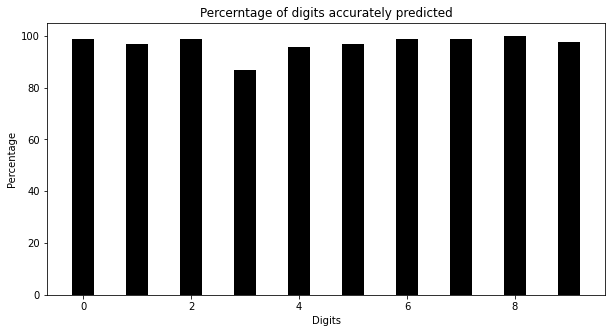

In [15]:
fig = plt.figure(figsize = (10, 5))
arr=[]
for i in range(10):
    arr.append(i)
plt.bar(arr, res, color ='black',width = 0.4)
 
plt.xlabel("Digits")
plt.ylabel("Percentage")
plt.title("Percerntage of digits accurately predicted")
plt.show()


Classification report for classifier KNeighborsClassifier(metric='euclidean'):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.95      0.98      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.90      0.90        91
           4       1.00      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.95      0.90      0.92        88
           9       0.91      0.92      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Accuracy of the KNN Algorithm:  0.9555061179087876


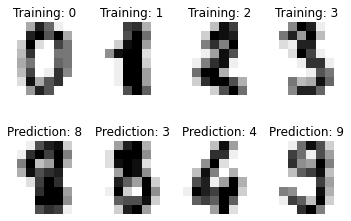

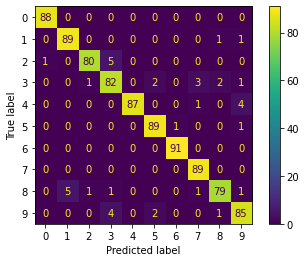

In [16]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN_classifier.fit(X_train, y_train)
predicted = KNN_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (KNN_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(KNN_classifier, X_test, y_test)

print("\nAccuracy of the KNN Algorithm: ", KNN_classifier.score(X_test, y_test))
plt.show()

In [17]:
values = set(y_test)

In [18]:
d_pred = dict(zip(values,[0]*10))
for i in range(len(y_test)):
    if y_test[i] == predicted[i]:
        d_pred[y_test[i]] += 1
d_pred

{0: 88, 1: 89, 2: 80, 3: 82, 4: 87, 5: 89, 6: 91, 7: 89, 8: 79, 9: 85}

In [19]:
d_real = dict()
for i in values:
    d_real[i] = list(y_test).count(i)
d_real

{0: 88, 1: 91, 2: 86, 3: 91, 4: 92, 5: 91, 6: 91, 7: 89, 8: 88, 9: 92}

In [20]:
res = list()
for i in values:
    x = round((d_pred[i]/d_real[i])*100,2)
    res.append(x)
res

[100.0, 97.8, 93.02, 90.11, 94.57, 97.8, 100.0, 100.0, 89.77, 92.39]

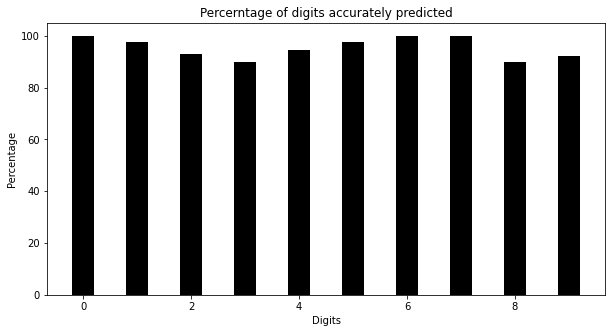

In [21]:
fig = plt.figure(figsize = (10, 5))
arr=[]
for i in range(10):
    arr.append(i)
plt.bar(arr, res, color ='black',width = 0.4)
 
plt.xlabel("Digits")
plt.ylabel("Percentage")
plt.title("Percerntage of digits accurately predicted")
plt.show()